In [3]:
from langchain_community.tools import WikipediaQueryRun

In [1]:
def function1(input1):
    return input1 + "from first function"

In [ ]:
def function2(input2):
    return input2 + " paul from second function"

In [3]:
def function3(input3):
    return input3 + "from third function"

In [4]:
from langgraph.graph import Graph

In [5]:
workflow1=Graph()

In [6]:
workflow1.add_node("fun1",function1)

In [7]:
workflow1.add_node("fun2",function2)

In [8]:
workflow1.add_edge("fun1","fun2")

In [9]:
workflow1.set_entry_point("fun1")

In [10]:
workflow1.set_finish_point("fun2")

In [11]:
app=workflow1.compile()

In [12]:
from IPython.display import Image, display

In [13]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

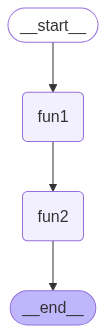

In [14]:
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
app.invoke("Hi I am Tapas ")

'Hi I am Tapas from first function paul from second function'

In [17]:
for output in app.stream("I am Tapas "):
    for key,value in output.items():
        print(f"Here is the output from {key}")
        print("-----------------")
        print(value)
        print("\n")

Here is the output from fun1
-----------------
I am Tapas from first function


Here is the output from fun2
-----------------
I am Tapas from first function paul from second function




In [40]:
from langchain_google_genai import ChatGoogleGenerativeAI



In [41]:
def llm_call(input1):
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input1)
    return output.content

In [42]:
def token_counter(input2):
    token=input2.split()
    token_len=len(token)
    return f"Total token in generated answer is {token_len}"

In [43]:
workflow2=Graph()

In [44]:
workflow2.add_node('My_LLM',llm_call)

In [45]:
workflow2.add_node("My_token_counter",token_counter)

In [46]:
workflow2.add_edge('My_LLM','My_token_counter')

In [47]:
workflow2.set_entry_point('My_LLM')

In [48]:
workflow2.set_finish_point("My_token_counter")

In [49]:
app2=workflow2.compile()

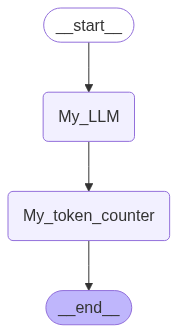

In [50]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [51]:
app2.invoke("Tell me about India's capital city.")

'Total token in generated answer is 308'

In [52]:
app2.invoke("Tell me about Tata enterprise in details.")

'Total token in generated answer is 503'

In [54]:
for output in app2.stream("Tell me about Tata enterprise."):
    for key,value in output.items():
        print(f"This is from {key}")
        print("------------")
        print(value)
        print("\n")

This is from My_LLM
------------
Tata Enterprises is not a single entity, but rather a massive **conglomerate** – a network of over 100 independent operating companies – under the Tata Group umbrella.  It's one of India's oldest and largest multinational conglomerates, with a presence in nearly every sector imaginable.

Here's a breakdown of key aspects:

* **History and Founding:**  Founded in 1868 by Jamsetji Tata, the group started with a textile mill and has since grown organically and through acquisitions into a global powerhouse.  Its history is deeply intertwined with India's own development.

* **Structure and Ownership:** While technically a network of independent companies, the Tata Trusts, a group of philanthropic trusts, hold significant ownership and influence over the group's strategic direction.  This unique structure emphasizes long-term value creation and social responsibility.

* **Major Businesses:** The group's diverse portfolio includes:
    * **Automotive:** Tata 